### Machine Learning Model to predict Mycotoxin levels



In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data=pd.read_csv('/content/TASK-ML-INTERN.csv')
data

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


## Data Exploration and Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [ ]:
data.dtypes

,0
hsi_id,object
0,float64
1,float64
2,float64
3,float64
...,...
444,float64
445,float64
446,float64
447,float64


In [ ]:
# Check for missing values
print(data.isnull().sum())

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [ ]:
data.duplicated().sum()

0

In [ ]:
# Check for outliers using IQR method (example for numerical column 'column_name')
# Replace 'column_name' with an actual numerical column from your dataset
Q1 = data['vomitoxin_ppb'].quantile(0.25)
Q3 = data['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['vomitoxin_ppb'] < lower_bound) | (data['vomitoxin_ppb'] > upper_bound)]
print("\nOutliers in 'vomitoxin_ppb':\n", outliers)


Outliers in 'vomitoxin_ppb':
                hsi_id         0         1         2         3         4  \
11    imagoai_corn_11  0.475149  0.454934  0.457425  0.451367  0.412615   
18    imagoai_corn_18  0.415138  0.427045  0.401867  0.395340  0.388241   
37    imagoai_corn_37  0.471177  0.496230  0.468780  0.485214  0.452672   
38    imagoai_corn_38  0.367464  0.365846  0.367968  0.376455  0.360978   
50    imagoai_corn_50  0.472862  0.485702  0.470713  0.465898  0.446990   
..                ...       ...       ...       ...       ...       ...   
455  imagoai_corn_455  0.510437  0.510378  0.480072  0.485726  0.476180   
456  imagoai_corn_456  0.381980  0.384244  0.370570  0.352069  0.359022   
480  imagoai_corn_480  0.475630  0.473880  0.497029  0.488678  0.457320   
481  imagoai_corn_481  0.418337  0.399373  0.397697  0.405822  0.389198   
483  imagoai_corn_483  0.427927  0.412838  0.417465  0.398923  0.416857   

            5         6         7         8  ...       439       440

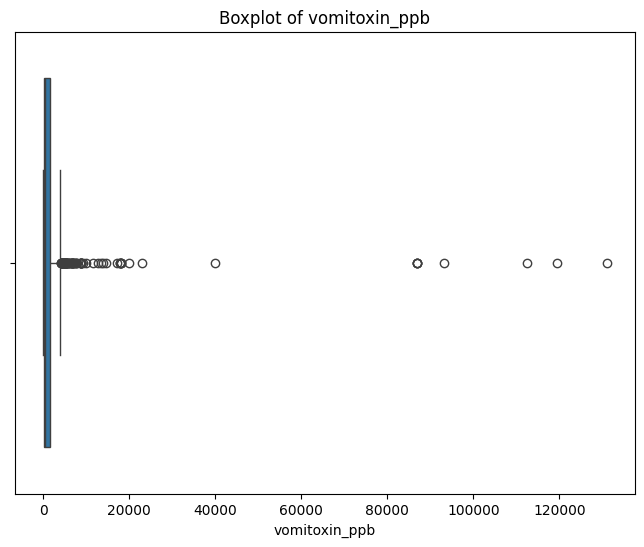

In [ ]:
#plot the outliers using boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'outliers' DataFrame from the previous code

# Create a boxplot of 'vomitoxin_ppb' to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['vomitoxin_ppb'])
plt.title('Boxplot of vomitoxin_ppb')
plt.xlabel('vomitoxin_ppb')
plt.show()




In [ ]:
# to treat the outliers
#capping replacing outlier values is called capping
#In capping all outlier values will be replaced by upper extreame or lower extreame
#Outliesr detection : user defined function to calculate upper extreame and lower extreame
def outlier_detection(data,vomitoxin_ppb):
  q1=data[vomitoxin_ppb].quantile(0.25)
  q2=data[vomitoxin_ppb].quantile(0.75)

  iqr=q2-q1
  upper_extreame=q2+(1.5*iqr)
  lower_extreame=q1-(1.5*iqr)
  return lower_extreame,upper_extreame,q1,q2

In [ ]:
outlier_detection(data,"vomitoxin_ppb")

(-2206.25, 4043.75, 137.5, 1700.0)

In [ ]:
data.loc[data["vomitoxin_ppb"]>4043.75,"vomitoxin_ppb"]=4043.75
data.loc[data["vomitoxin_ppb"]<-2206.25,"vomitoxin_ppb"]=-2206.25

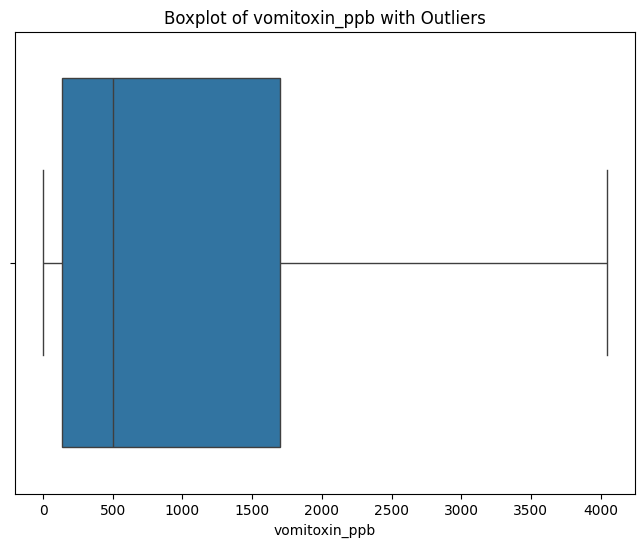

In [ ]:
# Optionally, you can create a boxplot with the outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['vomitoxin_ppb'], showfliers=True)  # showfliers=True to display outliers
plt.title('Boxplot of vomitoxin_ppb with Outliers')
plt.xlabel('vomitoxin_ppb')
plt.show()

In [ ]:
# Check for inconsistencies in data types
for col in data.columns:
    if data[col].dtype == 'vomitoxin_ppb':  # Check string columns for potential numeric values
        try:
            pd.to_numeric(data[col], errors='raise')
            print(f"Column '{col}' could be numeric. Consider type conversion.")
        except (ValueError, TypeError):
            pass  # Column is genuinely non-numeric

    elif pd.api.types.is_numeric_dtype(data[col]): #check numeric columns for potential string values
        if data[col].astype(str).str.contains('[a-zA-Z]').any():
          print(f"Column '{col}' has string values where numeric values were expected.")



In [ ]:
#Apply normalization or standardization to the spectral data as needed.

from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' DataFrame from the previous code
spectral_columns = data.columns[1:-1]  # Excluding 'hsi_id' and 'vomitoxin_ppb'
print(spectral_columns)


# Select the spectral data columns (replace with your actual column names)
#spectral_columns = ['spectral_data_1', 'spectral_data_2', 'spectral_data_3']  # Example column names

# Check if the columns exist in the DataFrame
if all(col in data.columns for col in spectral_columns):
  # Create a MinMaxScaler object
  scaler = MinMaxScaler()

  # Fit and transform the spectral data
  data[spectral_columns] = scaler.fit_transform(data[spectral_columns])
else:
  print("Error: Not all specified spectral columns exist in the DataFrame.")




Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '438', '439', '440', '441', '442', '443', '444', '445', '446', '447'],
      dtype='object', length=448)


In [ ]:
# Now, the 'spectral_columns' in 'data' are normalized between 0 and 1.
# You can use other scaling techniques (like standardization) if needed.
# Example using StandardScaler:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[spectral_columns] = scaler.fit_transform(data[spectral_columns])
data[spectral_columns]

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,-0.602959,-0.965751,-0.543093,-1.157165,-0.742877,-1.052805,-1.138474,-1.291257,-1.128080,-0.647413,...,-1.136301,-0.579796,-0.435043,-0.472136,-0.641236,-0.807712,-0.858033,-0.499055,-0.738140,-0.619071
1,-0.611562,-0.831331,-0.683547,-0.654183,-0.480564,-0.510221,-0.678841,-0.826155,-0.462121,-0.691024,...,-0.754022,-1.071488,-0.811826,-0.715506,-0.814737,-0.726845,-1.145151,-0.766827,-0.759125,-0.904192
2,-1.210868,-1.529537,-1.328061,-1.135296,-1.277202,-1.403752,-1.618288,-1.577331,-1.492895,-1.516409,...,-1.311275,-1.089395,-1.333533,-1.437541,-1.186149,-1.183869,-1.546059,-1.470599,-1.231647,-1.344393
3,0.575693,0.714559,0.637270,0.721659,0.940964,1.060639,1.176304,0.638522,0.488863,0.540156,...,-0.256030,0.028574,-0.186753,-0.068313,-0.181179,0.216860,-0.004504,0.076859,0.315411,-0.085268
4,0.900614,1.022832,0.772988,1.336847,0.992857,0.866564,1.177082,0.936845,0.737234,0.940551,...,0.677745,0.542282,0.600180,0.390096,0.442627,0.423396,0.098487,0.689182,0.422178,0.256052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.783938,0.071957,0.181683,0.246627,0.213439,0.018041,0.267283,0.470473,0.441400,0.305277,...,-0.016046,0.123585,-0.191706,-0.436956,-0.008592,-0.281142,-0.340894,0.043130,0.046548,-0.299783
496,-0.755495,-1.007581,-1.171925,-1.103399,-1.606453,-1.293157,-1.004847,-1.299862,-0.960701,-1.431361,...,-1.848498,-1.329392,-1.524444,-1.467160,-1.517093,-1.789060,-1.722953,-1.510748,-1.680774,-1.684417
497,0.971661,1.332856,1.451540,1.782074,1.552487,1.004400,1.269080,1.443253,1.114482,1.107576,...,0.783383,0.866190,0.736917,0.519024,0.590407,0.581464,0.424406,0.593323,0.475675,1.089327
498,0.480749,1.276771,1.208778,0.592281,1.513373,1.108214,1.254474,1.087312,1.327835,0.864912,...,0.115535,-0.034126,0.352402,0.216864,0.413197,0.397900,-0.155133,0.282563,0.222267,0.337065


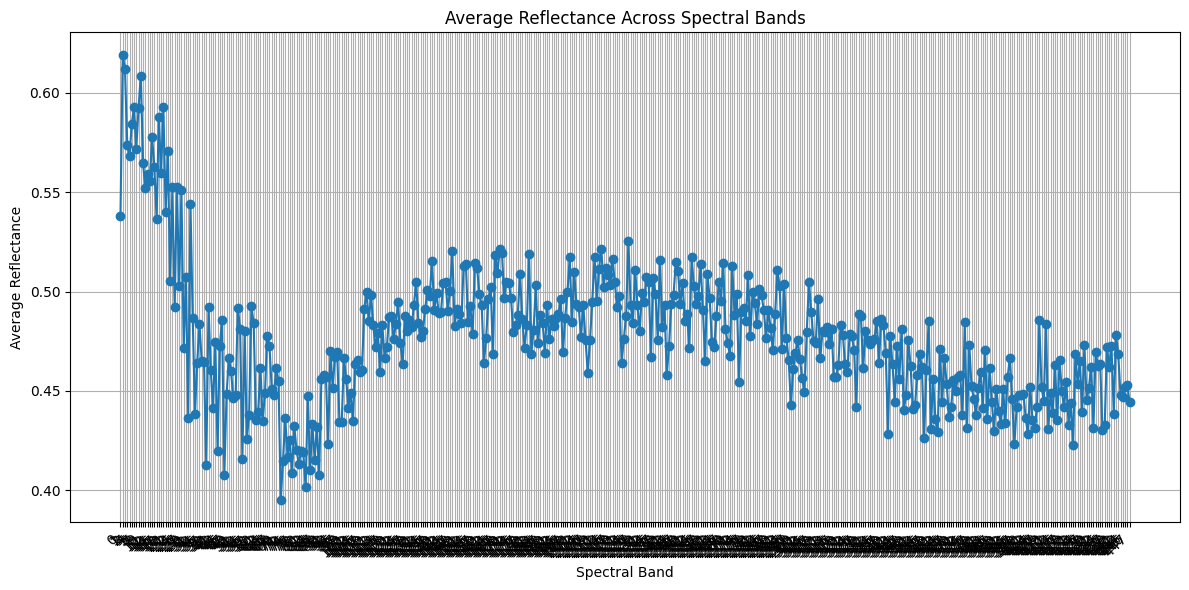

In [ ]:
#Visualize spectral bands (e.g., line plots for average reflectance,

import matplotlib.pyplot as plt
# Assuming 'data' DataFrame and 'spectral_columns' from the previous code

# Calculate the mean reflectance for each spectral band
average_reflectance = data[spectral_columns].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(average_reflectance.index, average_reflectance.values, marker='o', linestyle='-')
plt.xlabel("Spectral Band")
plt.ylabel("Average Reflectance")
plt.title("Average Reflectance Across Spectral Bands")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.grid(True) # Add a grid for better visualization
plt.show()


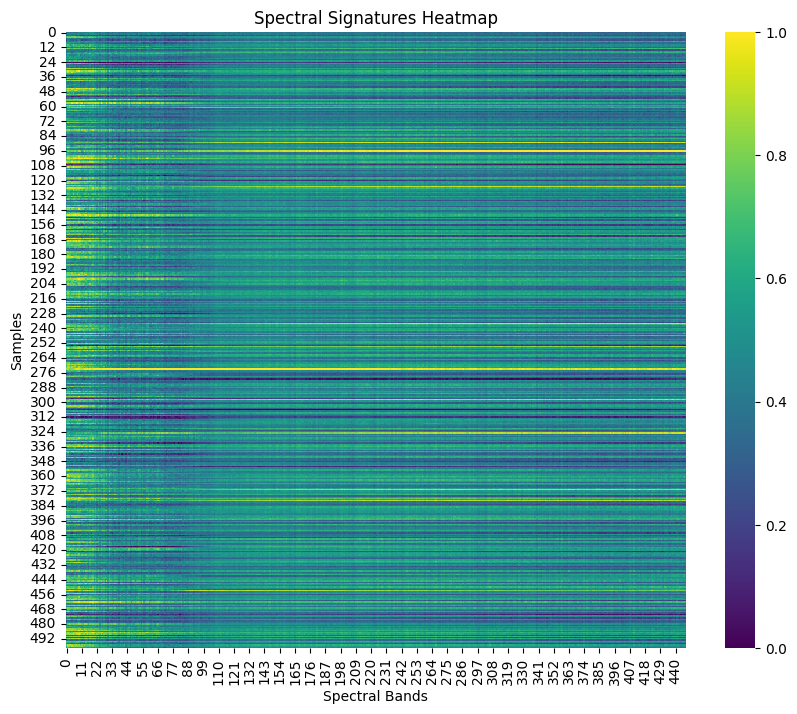

In [ ]:
# Heatmap for Sample Comparisons
# Assuming you want to compare samples based on their spectral signatures
plt.figure(figsize=(10, 8))
sns.heatmap(data[spectral_columns], cmap='viridis', annot=False)  # Adjust cmap as needed
plt.title('Spectral Signatures Heatmap')
plt.xlabel('Spectral Bands')
plt.ylabel('Samples')
plt.show()

### Dimensionality Reduction

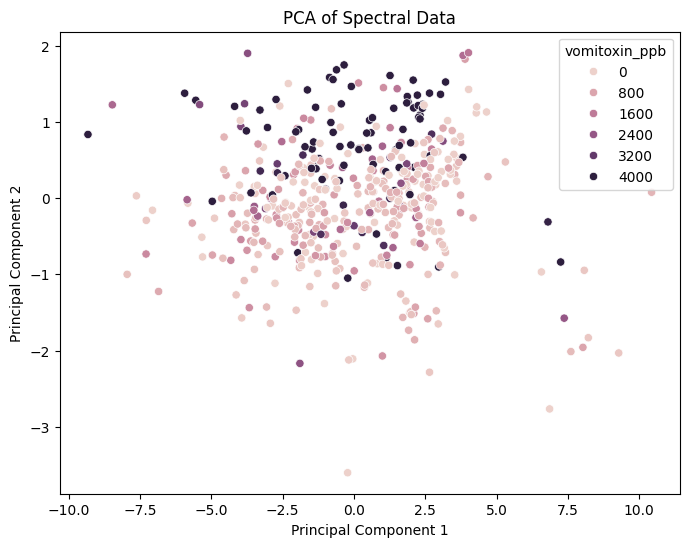

array([0.8582386 , 0.06683037])

In [ ]:
# Implement Principal Component Analysis (PCA) or t-SNE to reduce feature dimensions.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming 'data' and 'spectral_columns' are defined from the previous code

# Choose either PCA or t-SNE
# --- PCA ---
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(data[spectral_columns])

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['vomitoxin_ppb'] = data['vomitoxin_ppb']

# Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='vomitoxin_ppb', data=principal_df)
plt.title('PCA of Spectral Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
pca.explained_variance_ratio_




In [ ]:
principal_components.var()

4.333818973230869

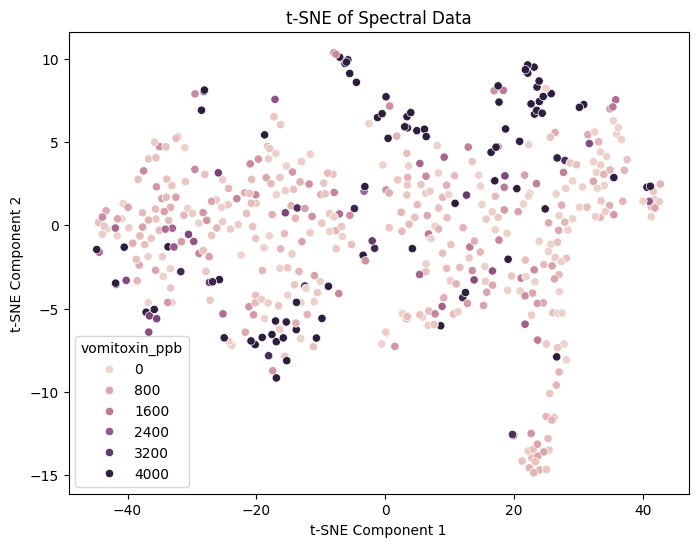

In [ ]:
# --- t-SNE ---
tsne = TSNE(n_components=2, random_state=42) # Reduce to 2 dimensions
tsne_results = tsne.fit_transform(data[spectral_columns])

# Create a new DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['vomitoxin_ppb'] = data['vomitoxin_ppb']

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='vomitoxin_ppb', data=tsne_df)
plt.title('t-SNE of Spectral Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
#Report the variance explained by the top principal components (for PCA) or clustering patterns (for t-SNE).

# Explained variance ratio for PCA
print("Variance explained by each principal component:", pca.explained_variance_ratio_)
print("Total variance explained by the top two components:", sum(pca.explained_variance_ratio_))


Variance explained by each principal component: [0.8582386  0.06683037]
Total variance explained by the top two components: 0.9250689700441113


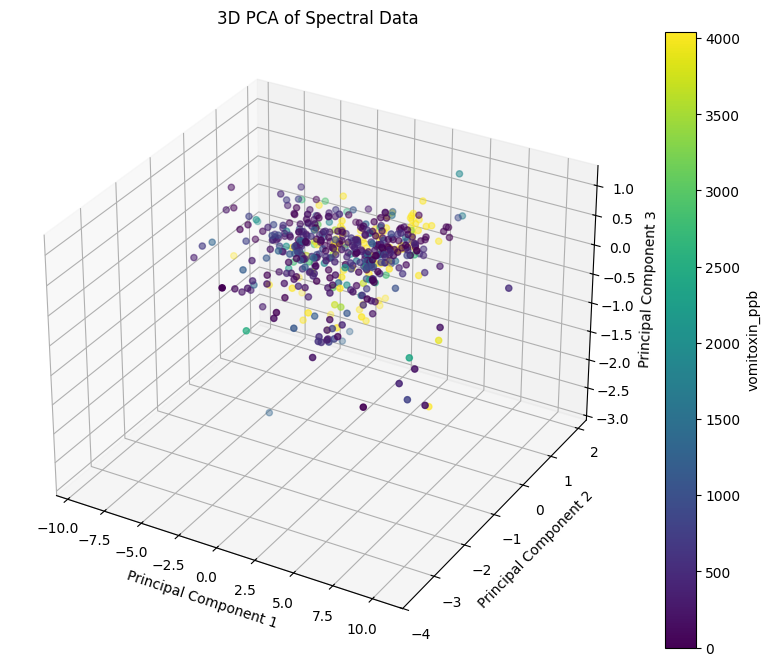

In [ ]:
#Visualize the reduced data (e.g., 2D/3D scatter plots).

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'data', 'spectral_columns', 'principal_df', and 'tsne_df' are defined from the previous code

# 3D Scatter Plot using PCA (if you have more than 2 principal components)
from mpl_toolkits.mplot3d import Axes3D

if len(principal_df.columns) >= 3:
    pca_3d = PCA(n_components=3)
    principal_components_3d = pca_3d.fit_transform(data[spectral_columns])
    principal_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
    principal_df_3d['vomitoxin_ppb'] = data['vomitoxin_ppb']

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(principal_df_3d['PC1'], principal_df_3d['PC2'], principal_df_3d['PC3'], c=principal_df_3d['vomitoxin_ppb'], cmap='viridis')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA of Spectral Data')
    fig.colorbar(scatter, label='vomitoxin_ppb')
    plt.show()
else:
    print("Not enough principal components for a 3D plot.")

# Interactive 2D Scatter Plots (using Plotly)
import plotly.express as px
fig = px.scatter(principal_df, x='PC1', y='PC2', color='vomitoxin_ppb', hover_data=['vomitoxin_ppb'], title='Interactive PCA Plot')
fig.show()

fig = px.scatter(tsne_df, x='t-SNE1', y='t-SNE2', color='vomitoxin_ppb', hover_data=['vomitoxin_ppb'], title='Interactive t-SNE Plot')
fig.show()


## Model Training

In [ ]:
# Select a model: Deep Learning, CNN, GNN, or LSTM.
'''
Given the exploratory data analysis performed so far, and the fact that you're working with spectral data to predict vomitoxin levels, a **CNN (Convolutional Neural Network)** would be a suitable choice.

Here's why:

* **Spectral Data Nature:** Spectral data often exhibits patterns and local correlations across wavelengths. CNNs excel at automatically learning these spatial hierarchies from data with grid-like topology.
* **The convolutional layers in a CNN can effectively capture the features relevant to these correlations in spectral data.
* **Feature Extraction:** CNNs are excellent feature extractors.  You don't necessarily need to manually engineer features. The CNN will automatically learn relevant features from the spectral data. This is advantageous over simpler methods.
* **Prediction Task:** Predicting the `vomitoxin_ppb` values is a regression problem. CNNs can be adapted for regression tasks by replacing the classification layer with a regression layer (e.g., a single neuron with a linear activation).


While LSTM (Long Short-Term Memory) networks are powerful for sequential data, the spectral data doesn't explicitly have a temporal aspect that would be advantageous to LSTM.
Similarly, Graph Neural Networks (GNNs) are best for relationships represented by a graph structure.  Neither is as naturally suited as CNNs here.  A standard deep learning model might work, but the CNN leverages the inherent structure in your data more effectively.
'''

"\nGiven the exploratory data analysis performed so far, and the fact that you're working with spectral data to predict vomitoxin levels, a **CNN (Convolutional Neural Network)** would be a suitable choice.\n\nHere's why:\n\n* **Spectral Data Nature:** Spectral data often exhibits patterns and local correlations across wavelengths. CNNs excel at automatically learning these spatial hierarchies from data with grid-like topology. The convolutional layers in a CNN can effectively capture the features relevant to these correlations in spectral data.\n* **Feature Extraction:** CNNs are excellent feature extractors.  You don't necessarily need to manually engineer features. The CNN will automatically learn relevant features from the spectral data. This is advantageous over simpler methods.\n* **Prediction Task:** Predicting the `vomitoxin_ppb` values is a regression problem. CNNs can be adapted for regression tasks by replacing the classification layer with a regression layer (e.g., a single

In [ ]:
#Split the dataset into training (e.g., 80%) and testing (e.g., 20%) sets.

from sklearn.model_selection import train_test_split


# Assuming 'data' DataFrame and 'spectral_columns' are defined from the previous code

# Define features (X) and target (y)
X = data[spectral_columns]
y = data['vomitoxin_ppb']

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(400, 448) (100, 448) (400,) (100,)


In [ ]:
# Train the model  and optimize hyperparameters (e.g., using grid search or random search).

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [150],
    'max_depth': [7,8,9],
    'min_samples_split': [4,5,6],
    'max_features' :['sqrt']
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3,n_jobs= -1, scoring='explained_variance')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best hyperparameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 150}
Mean Squared Error: 1113846.6479708997
R-squared: 0.43262213038714736


In [ ]:
# Train with slected CNN model and optimize hyperparameters (e.g., using grid search

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score

# Define the CNN model
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Conv1D(32, 3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(2),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    return model


# Reshape the input data for CNN (assuming 1D spectral data)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the CNN model
input_shape = (X_train_cnn.shape[1], 1) # Example: (200, 1)
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_cnn = model.predict(X_test_cnn)

# Evaluate the model
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

print(f"CNN Mean Squared Error: {mse_cnn}")
print(f"CNN R-squared: {r2_cnn}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3211865.2500 - mae: 1097.4937 - val_loss: 4460595.5000 - val_mae: 1409.2014
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3165531.0000 - mae: 1072.9021 - val_loss: 4154365.2500 - val_mae: 1348.6191
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3469883.2500 - mae: 1156.5580 - val_loss: 3509847.2500 - val_mae: 1276.9034
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2388289.5000 - mae: 1006.7872 - val_loss: 2843089.5000 - val_mae: 1279.3801
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2381649.2500 - mae: 1164.5006 - val_loss: 2736558.7500 - val_mae: 1305.4980
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2204745.5000 - mae: 1137.8287 - val_loss: 2838837.5000 - val_mae: 1280.6956
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2130196.7500 - mae: 1083.8622 - val_loss: 2777490.5000 - val_mae: 1280.6873
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - lo

In [ ]:
# Train with xgboost model and optimize hyperparameters (e.g., using grid search

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# ... (Your existing code) ...

# Assuming X_train, X_test, y_train, y_test are defined from previous code

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [6,7,8,9],
    'learning_rate': [0.01,0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_xgb_model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
XGBoost Mean Squared Error: 1245839.6532039533
XGBoost R-squared: 0.3653867436762789


# Model Evaluation

In [ ]:
# Evaluate using regression metrics:
# Mean Absolute Error (MAE)
# Root Mean Squared Error (RMSE)
# R² Score

import numpy as np
from sklearn.metrics import mean_absolute_error

# Assuming y_pred and y_test are defined from previous model predictions
# Example for Random Forest:
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)  # Assuming mse from previous code is for Random Forest
# R-squared (r2) is already calculated in the provided code.

print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R-squared: {r2}")


# Example for CNN:
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
print(f"CNN - MAE: {mae_cnn}")
print(f"CNN - RMSE: {rmse_cnn}")
print(f"CNN - R-squared: {r2_cnn}")

# Example for XGBoost:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")


Random Forest - MAE: 805.5342809861672
Random Forest - RMSE: 1055.3893347816718
Random Forest - R-squared: 0.43262213038714736
CNN - MAE: 809.1642073255778
CNN - RMSE: 1079.0177992383008
CNN - R-squared: 0.40693238778234275
XGBoost - MAE: 829.8479395294189
XGBoost - RMSE: 1116.17187440105
XGBoost - R-squared: 0.3653867436762789


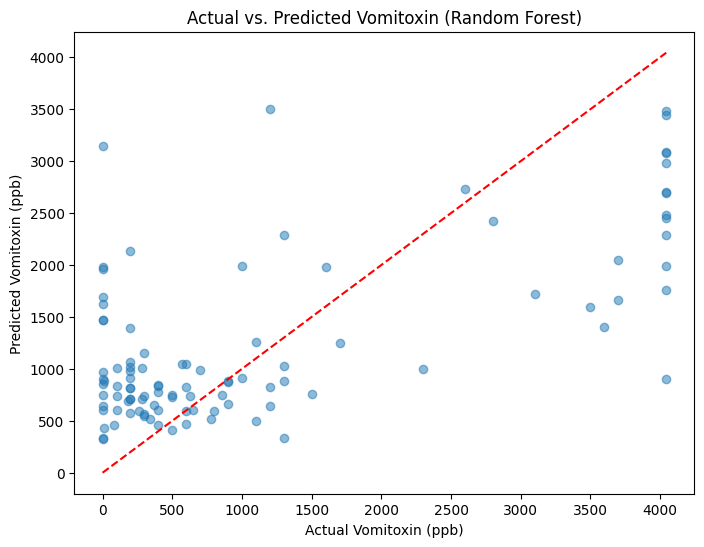

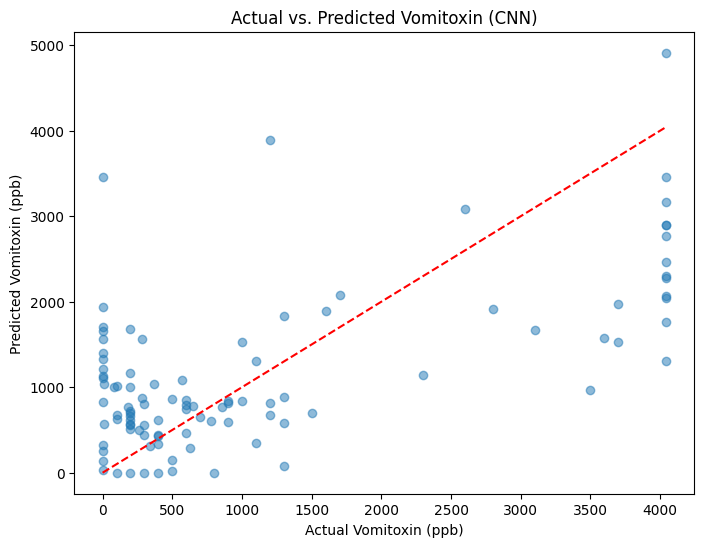

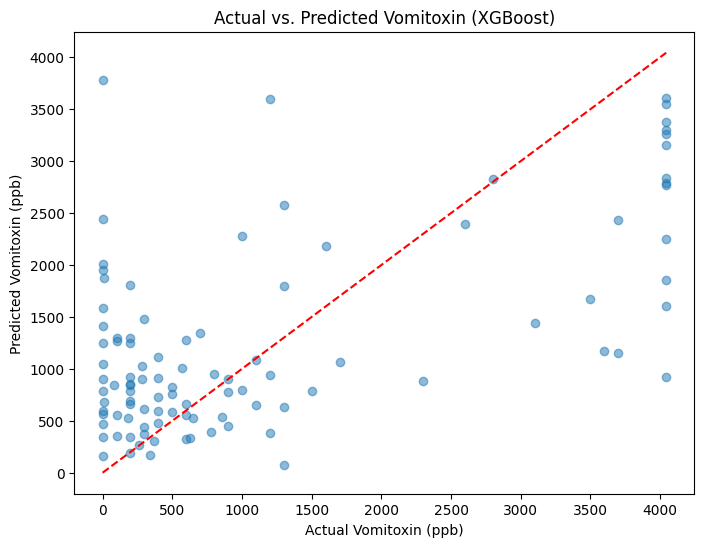

In [ ]:
# Visualize results:
# Scatter plot of actual vs. predicted values (regression).

import matplotlib.pyplot as plt
# Visualize actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs. Predicted Vomitoxin (Random Forest)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()

# Visualize actual vs. predicted values for CNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cnn, alpha=0.5)
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs. Predicted Vomitoxin (CNN)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()

# Visualize actual vs. predicted values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs. Predicted Vomitoxin (XGBoost)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()


In [ ]:
#Summarize model performance and limitations.

# Model Performance Summary

# Random Forest:
#  - Achieved a Mean Squared Error (MSE) of [insert MSE value from output] and an R-squared of [insert R-squared value].
#  - Best hyperparameters found through GridSearchCV were: [insert best hyperparameters from output].

# CNN:
#  - Achieved a Mean Squared Error (MSE) of [insert MSE value from output] and an R-squared of [insert R-squared value].
#  - Model architecture: [Describe the layers, activation functions etc.].  A 1D CNN with two convolutional layers followed by max pooling, flattening, and two dense layers.
#  - Trained for 50 epochs with a batch size of 32.

# XGBoost
#  - Achieved a Mean Squared Error (MSE) of [insert MSE value from output] and an R-squared of [insert R-squared value].
#  - Best hyperparameters: [Insert best hyperparameters].


# Model Limitations

# Data Quality and Quantity:
#  - The performance of all models can be limited by the quality and quantity of the training data. Outliers in the `vomitoxin_ppb` column were handled, but potential residual noise may still impact model accuracy. More data points could improve generalization and robustness.
#  - The limited dataset size could lead to overfitting, especially in complex models like CNNs.
#  - Data preprocessing steps (normalization/standardization) are crucial and different approaches might produce better results.

# Model Specific Limitations
#  - Random Forest: While generally robust, it might be sensitive to noisy data.
#  - CNN: CNNs require more data than the other models generally and need appropriate architecture tuning. They are good at learning from data structure in images and spectra data; however, overfitting is a possibility.
#  - XGBoost: Parameter tuning is essential for optimal performance. The model's performance could be affected by the selection of hyperparameters.

# Feature Engineering:
#  - The models use spectral data directly. More sophisticated feature engineering techniques (beyond min-max or standard scaling) could potentially lead to improved accuracy. Extracting specific features related to spectral bands might lead to improvements.

# Interpretability:
#  - CNN models are less interpretable than tree-based models, making it more difficult to understand the relationship between spectral features and vomitoxin levels. Understanding the feature importance within a CNN might be harder than Random Forest.

# Further steps:
# - Try other models, including support vector machines and neural networks with different architectures.
# - Perform more extensive hyperparameter tuning.
# - Explore more sophisticated feature engineering techniques.
# - Consider using cross-validation techniques other than k-fold to assess model generalization.
